In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

#import self defined functions
from bpe.utility_functions import get_words,performance,compare_to_gpt_encoding
from bpe.BPE_function import bpe,get_best_merges

In [ ]:
#reading training, validation and test data
with open (r"corpora/Shakespeare_clean_train.txt", 'r') as f:
  text_train = f.read()
with open (r"corpora/Shakespeare_clean_valid.txt", 'r') as f:
  text_valid = f.read()
with open (r"corpora/Shakespeare_clean_test.txt", 'r') as f:
  text_test = f.read()


In [3]:
#evaluating accuracy of BPE with different k
dict_train = get_words(text_train)#gets unique words and their frequencies in the training data
performances = []
min_perform = 101
ks = []

for i in range(1,2001,100):
    vocab_train, sorted_token_freq_train, dict_matrix_train = bpe(dict_train,i)#train vocabulary with BPE with i merges
    perform = performance(dict_train,vocab_train,500)#evaluate accuracy
    #append results
    performances.append(perform)
    ks.append(i)
    #if performance is above 75% and is the minimum so far, store the k value
    if perform >= 75:
        if perform < min_perform:
            min_perform = int(perform)
            min_k = i



2.1999999999999997
7.6
13.200000000000001
21.0
27.6
34.2
41.199999999999996
48.8
57.599999999999994
66.0
73.8
83.0
91.4
98.0
100.0
100.0
100.0
100.0
100.0
100.0


Minimum k for accuracy above 75% is:  1101  with accuracy:  83


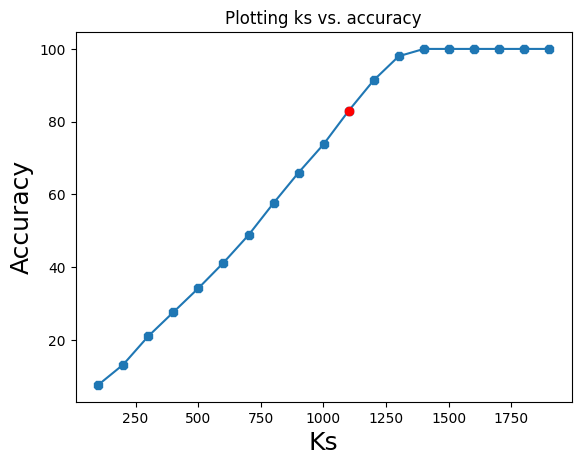

In [ ]:
# plotting the results: ks vs. accuracy
print("Minimum k for accuracy above 75% is:", min_k, ", with accuracy:", min_perform) 
fig = plt.figure()
ax = fig.add_subplot()
x = ks[1:]
y = performances[1:]
ax.plot(x, y, marker = '8')
ax.plot(min_k, min_perform, marker="o", color="red")
ax.set_title('Plotting ks vs. accuracy')
ax.set_xlabel('Ks', fontsize = 18)
ax.set_ylabel('Accuracy', fontsize = 18)
plt.show()

# saving the figure
fig.savefig(r'img/ks_vs_accuracy.png')

In [ ]:
#with the minimum k, find the best merges and n-gram

#get words and their frequencies in training, validation and test data  
dict_train = get_words(text_train)
dict_valid = get_words(text_valid)
dict_test = get_words(text_test)

#find top 3 best merges and n-gram with the minimum k found above, as well as thier perplexities
best_k,best_perplexity,best_n_gram,second_best_k,second_best_perplexity,second_best_n_gram,third_best_k,third_best_perplexity,third_best_n_gram,ks,n_gram_num,perplexities = get_best_merges(dict_train,text_train,dict_valid,text_valid,min_k,2001,100)
result = ["best k:",best_k,"best n gram", best_n_gram,"best k perplexity:",best_perplexity,"2nd best k:",second_best_k,"2nd best n gram", second_best_n_gram,"2nd best k perplexity:",second_best_perplexity,"3rd best k:",third_best_k,"3rd best n gram",third_best_n_gram,"3rd best k perplexity:",third_best_perplexity]

#save the results to a text file
with open("../k_merges_n_gram.txt", "w") as k_merges_n_gram:
  for item in result:
     k_merges_n_gram.write(f"{item}\n")


N-gram split for 1-gram, k = 1101: [['the_'], ['tra'], ['ge'], ['dy_'], ['of_'], ['antony_'], ['and_'], ['cleopatra_'], ['dra'], ['ma']]
Perplexity: 440.26
N-gram split for 2-gram, k = 1101: [['the_', 'tra'], ['tra', 'ge'], ['ge', 'dy_'], ['dy_', 'of_'], ['of_', 'antony_'], ['antony_', 'and_'], ['and_', 'cleopatra_'], ['cleopatra_', 'dra'], ['dra', 'ma'], ['ma', 'tis_']]
Perplexity: 154.04
N-gram split for 3-gram, k = 1101: [['the_', 'tra', 'ge'], ['tra', 'ge', 'dy_'], ['ge', 'dy_', 'of_'], ['dy_', 'of_', 'antony_'], ['of_', 'antony_', 'and_'], ['antony_', 'and_', 'cleopatra_'], ['and_', 'cleopatra_', 'dra'], ['cleopatra_', 'dra', 'ma'], ['dra', 'ma', 'tis_'], ['ma', 'tis_', 'per']]
Perplexity: 496.18
N-gram split for 4-gram, k = 1101: [['the_', 'tra', 'ge', 'dy_'], ['tra', 'ge', 'dy_', 'of_'], ['ge', 'dy_', 'of_', 'antony_'], ['dy_', 'of_', 'antony_', 'and_'], ['of_', 'antony_', 'and_', 'cleopatra_'], ['antony_', 'and_', 'cleopatra_', 'dra'], ['and_', 'cleopatra_', 'dra', 'ma'], ['cle

Best k and n-gram with lowest perplexity is:  1101 , with n-gram:  2  and perplexity:  154.04192175683718
2nd Best k and n-gram with 2nd lowest perplexity is:  1201 , with n-gram:  2  and perplexity:  168.734444932929
3rd Best k and n-gram with 3rd lowest perplexity is:  1301 , with n-gram:  2  and perplexity:  185.35924638472375


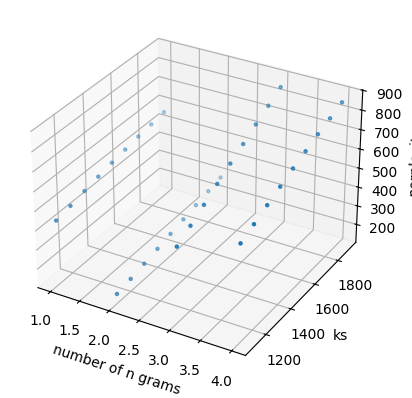

In [ ]:
# plot the results in a 3D plot: ks vs. n-grams vs. perplexities
print("Best k and n-gram with lowest perplexity is: ", best_k, ", with n-gram: ", best_n_gram, " and perplexity: ", best_perplexity)
print("2nd Best k and n-gram with 2nd lowest perplexity is: ", second_best_k, ", with n-gram: ", second_best_n_gram, " and perplexity: ", second_best_perplexity)
print("3rd Best k and n-gram with 3rd lowest perplexity is: ", third_best_k, ", with n-gram: ", third_best_n_gram, " and perplexity: ", third_best_perplexity)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = np.array(n_gram_num)
ys = np.array(ks)
zs = np.array(perplexities)
ax.scatter(xs, ys, zs, marker=".")

ax.set_xlabel('number of n grams')
ax.set_ylabel('ks')
ax.set_zlabel('perplexity')

plt.show()

#saving the figure
fig.savefig('ks_vs_n_grams_perplexities.png')

In [ ]:
# train a dictionary of byte pairs and their respective counts on training and test data

# read the best k values from the text file
with open("../k_merges_n_gram.txt", "r") as f:
	k_merges_n_gram_lines = f.read().splitlines()

best_k = int(k_merges_n_gram_lines[1])
second_best_k = int(k_merges_n_gram_lines[7])
third_best_k = int(k_merges_n_gram_lines[13])


 #builds the byte pair vocabulary and the sorted token frequency
vocab_train_best_k, sorted_token_freq_train_best_k, dict_matrix_train_best_k = bpe(dict_train,best_k)
vocab_train_2nd_best_k, sorted_token_freq_train_2nd_best_k, dict_matrix_train_2nd_best_k = bpe(dict_train,second_best_k)
vocab_train_3rd_best_k, sorted_token_freq_train_3rd_best_k, dict_matrix_train_3rd_best_k = bpe(dict_train,third_best_k)

In [ ]:
# test and print performance of training and test set for the 3 best k values found above

# training accuracies
train_accuracy_best_k = performance(dict_train, vocab_train_best_k, 500)
train_accuracy_2nd_best_k = performance(dict_train, vocab_train_2nd_best_k, 500)
train_accuracy_3rd_best_k = performance(dict_train, vocab_train_3rd_best_k, 500)

# test accuracies
test_accuracy_best_k = performance(dict_test, vocab_train_best_k, 500)
test_accuracy_2nd_best_k = performance(dict_test, vocab_train_2nd_best_k, 500)
test_accuracy_3rd_best_k = performance(dict_test, vocab_train_3rd_best_k, 500)

print("train accuracy best k: ", train_accuracy_best_k)
print("train accuracy 2nd best k: ", train_accuracy_2nd_best_k)
print("train accuracy 3rd best k: ", train_accuracy_3rd_best_k)

print("test accuracy best k: ", test_accuracy_best_k)
print("test accuracy 2nd best k: ", test_accuracy_2nd_best_k)
print("test accuracy 3rd best k: ", test_accuracy_3rd_best_k)

train accuracy best k:  83.0
train accuracy 2nd best k:  91.4
train accuracy 3rd best k:  98.0
test accuracy best k:  70.0
test accuracy 2nd best k:  75.6
test accuracy 3rd best k:  79.4


C:\Users\belan\AppData\Local\Temp\ipykernel_151996\1261390409.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


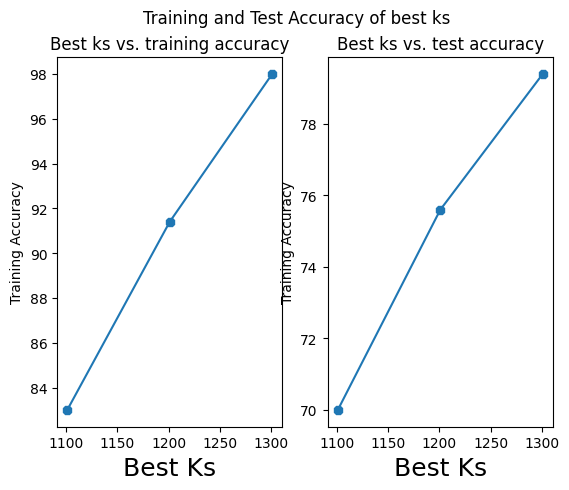

In [ ]:
# plot the results: top 3 merges vs. accuracy on test and training data
fig, (ax1, ax2) = plt.subplots(1, 2)

# results on training data
fig.suptitle('Training and Test Accuracy of best ks')

x1 = [third_best_k, second_best_k, best_k]
y1 = [train_accuracy_3rd_best_k,train_accuracy_2nd_best_k,train_accuracy_best_k]

ax1.plot(x1, y1, marker = '8')
ax1.set_title('Best ks vs. training accuracy')
ax1.set_xlabel('Best Ks', fontsize = 18)
ax1.set_ylabel('Training Accuracy', fontsize = 10)

# results on test data
x2 = [third_best_k, second_best_k, best_k]
y2 = [test_accuracy_3rd_best_k,test_accuracy_2nd_best_k,test_accuracy_best_k]
ax2.plot(x2, y2, marker = '8')
ax2.set_title('Best ks vs. test accuracy')
ax2.set_xlabel('Best Ks', fontsize = 18)
ax2.set_ylabel('Training Accuracy', fontsize = 10)

fig.show()

# saving the figure
fig.savefig(r'../img/best_ks_vs_training_and_test_accuracy.png')

In [10]:
#compare our BPE split to split of another system (in this case gpt 3.5)

model_name="gpt-3.5-turbo"
#comparision of tokenization of training data
tokens_train1 = compare_to_gpt_encoding(text_train, vocab_train_best_k, model_name)
tokens_train2 = compare_to_gpt_encoding(text_train, vocab_train_2nd_best_k, model_name)
tokens_train3 = compare_to_gpt_encoding(text_train, vocab_train_3rd_best_k, model_name)

#comparision of tokenization of test data
tokens_test1 = compare_to_gpt_encoding(text_test, vocab_train_best_k, model_name)
tokens_test2 = compare_to_gpt_encoding(text_test, vocab_train_2nd_best_k, model_name)
tokens_test3 = compare_to_gpt_encoding(text_test, vocab_train_3rd_best_k, model_name)

Comparison training data best merges:0.45866141732283466
 Comparison training data second best merges:0.45866141732283466
 Comparison training data third best merges:0.4241666666666667
 Comparison test data best merges0.22440944881889763
, Comparison test data second best merges0.2110009017132552
 Comparison test data third best merges0.20083333333333334


C:\Users\belan\AppData\Local\Temp\ipykernel_151996\2830197424.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


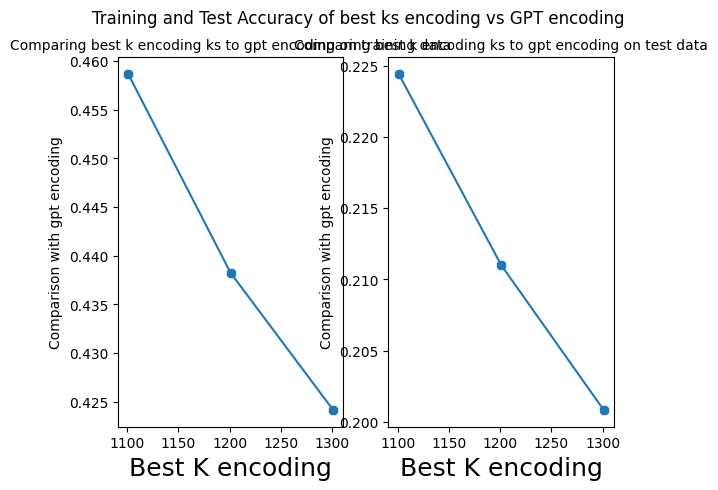

In [ ]:
# plot the results: top 3 best merges performance accuracy vs. GPT encoding accuracy

print(f"Comparison training data best merges:{tokens_train1}\n Comparison training data second best merges:{tokens_train1}\n Comparison training data third best merges:{tokens_train3}\n Comparison test data best merges{tokens_test1}\n, Comparison test data second best merges{tokens_test2}\n Comparison test data third best merges{tokens_test3}")

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Training and Test Accuracy of best ks encoding vs GPT encoding')

# results on training data
x1 = [third_best_k, second_best_k, best_k]
y1 = [tokens_train3,tokens_train2,tokens_train1]

ax1.plot(x1, y1, marker = '8')
ax1.set_title('Comparing best k encoding ks to gpt encoding on training data',fontsize = 10)
ax1.set_xlabel('Best K encoding', fontsize = 18)
ax1.set_ylabel('Comparison with gpt encoding', fontsize = 10)

# results on test data
x2 = [third_best_k, second_best_k, best_k]
y2 = [tokens_test3,tokens_test2,tokens_test1]
ax2.plot(x2, y2, marker = '8')
ax2.set_title('Comparing best k encoding ks to gpt encoding on test data',fontsize = 10)
ax2.set_xlabel('Best K encoding', fontsize = 18)
ax2.set_ylabel('Comparison with gpt encoding', fontsize = 10)

fig.show()
# saving the figure
fig.savefig(r'../img/best_ks_vs_gpt_encoding_training_and_test.png')


In [ ]:
# run BPE split on different (non-shakespearean) test set and evaluate performance

# load a different test set (in this case friends transcript)
with open ('../corpora/friends.txt', 'r') as f:
  friends = f.read()

# build byte pairs vocabulary on training data with the 3 best k values found above
friends_dict = get_words(friends)
friends_accuracy1 = performance(friends_dict, vocab_train_best_k, 500)
friends_accuracy2 = performance(friends_dict, vocab_train_2nd_best_k, 500)
friends_accuracy3 = performance(friends_dict, vocab_train_3rd_best_k, 500)

print("Accuracy on Friends best merges: ", friends_accuracy1,". Accuracy on Friends second best merges: ", friends_accuracy2,". Accuracy on Friends third best merges: ", friends_accuracy3)

# also compare to gpt encoding of BPE split
tokens_friends1 = compare_to_gpt_encoding(friends, vocab_train_best_k, model_name)
tokens_friends2 = compare_to_gpt_encoding(friends, vocab_train_2nd_best_k, model_name)
tokens_friends3 = compare_to_gpt_encoding(friends, vocab_train_3rd_best_k, model_name)

print("Comparison on Friends best merges: ", tokens_friends1,". Comparison on Friends second best merges: ", tokens_friends2,". Comparison on Friends third best merges: ", tokens_friends3)

Accuracy on Friends best merges:  44.800000000000004 . Accuracy on Friends second best merges:  48.199999999999996 . Accuracy on Friends third best merges:  49.4
Comparison on Friends best merges:  0.531496062992126 . Comparison on Friends second best merges:  0.5112714156898106 . Comparison on Friends third best merges:  0.49833333333333335


C:\Users\belan\AppData\Local\Temp\ipykernel_151996\990657293.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


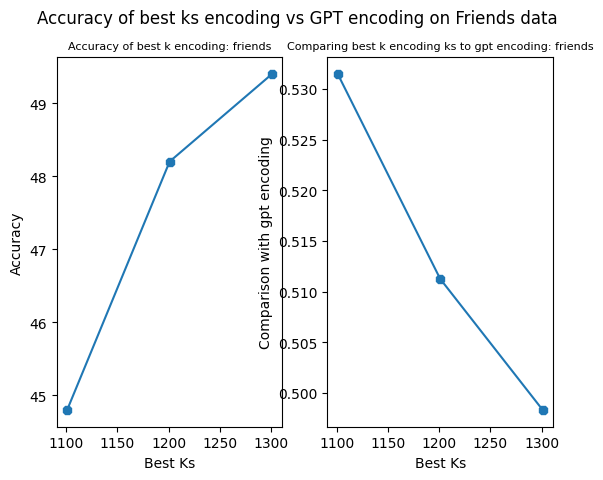

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Accuracy of best ks encoding vs GPT encoding on Friends data')

x1 = [third_best_k, second_best_k, best_k]
y1 = [friends_accuracy3,friends_accuracy2,friends_accuracy1]

ax1.plot(x1, y1, marker = '8')
ax1.set_title('Accuracy of best k encoding: friends',fontsize = 8)
ax1.set_xlabel('Best Ks', fontsize = 10)
ax1.set_ylabel('Accuracy', fontsize = 10)

x2 = [third_best_k, second_best_k, best_k]
y2 = [tokens_friends3,tokens_friends2,tokens_friends1]
ax2.plot(x2, y2, marker = '8')
ax2.set_title('Comparing best k encoding ks to gpt encoding: friends',fontsize = 8)
ax2.set_xlabel('Best Ks', fontsize = 10)
ax2.set_ylabel('Comparison with gpt encoding', fontsize = 10)

fig.show()
fig.savefig(r'../img/best_ks_vs_gpt_encoding_friends.png')